<a id="contents"></a>
__Кластеризация данных__

Структура блокнота:

1. [Предварительная обработка данных](#title_1)
    * [Вывод первых 10 записей датасета](#title_11)
    * [Предварительная оценка данных](#title_12)
    * [Названия столбцов и выявление проблем с названиями](#title_13)
    * [Выявление пропусков и их устранение](#title_14)
    * [Проверка дубликатов и их устранение](#title_15)
    * [Проверка типов данных](#title_16)
2. [Применение методов классификации](#title_2)
    * [Разбиение на тестовый и тренировочный наборы данных](#title_21)
    * [Разработка предсказательной модели. Метод K-ближайших соседей](#title_22)
    * [Разработка предсказательной модели. Логистическая регрессия](#title_23)
    * [Разработка предсказательной модели. Случайный лес](#title_24)
    * [Оценка ошибки классификации](#title_25)
    * [Матрица неточностей](#title_26)
    * [График ROC-кривой](#title_27)
    * [Выводы](#title_28)

<a id="title_1"></a>
# 0. Предварительная обработка данных


<a id="title_11"></a>
__Вывод первых 10 записей датасета__

Здесь происходит подключение необходимых для работы библиотек, загрузка данных и отображение первых 10 строк датасета.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_path = '../liver.csv'
df = pd.read_csv(dataset_path)

df.head(10)

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset123
0,65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208.0,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154.0,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202.0,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202.0,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290.0,53,58,6.8,3.4,1.00,1


<a id="title_12"></a>
__Предварительная оценка данных__

Датасет заболеваемости печени состоит из 587 записей и 11 колонок.

По таблице ниже можно сказать, что столбцы TotalBilirubin (Общий билирубин), Alkaline_Phosphotase (Щелочная фосфатаза) и Albumin_and_Globulin_Ratio (Соотношение альбуминов и глобулинов) содержат null значения (пропуски) в размере 2, 1 и 4 и записей, соответственно. Всего 7 записей с пропуском значений.

Столбцы Gender (Пол), Aspartate_Aminotransferase (Аспартат-атаминотрансфераза) и Dataset123 (Поле, отвечающее за состояние пациента - болен\здоров) имеют не соответствия в типах данных. Следует заменить типы на category, int64 и bool, соответственно.

Также название столбца 'Dataset123' не отражает его назначения. Его следует заменить на 'Is_sick'.

Описание колонок приведено в таблице ниже:

|Column                    |Description     |
|:-------------------------|:---------------|
|Age                       |Возраст пациента|
|Gender                    |Пол пациента|
|TotalBilirubin            |Общий билирубин|
|Direct_Bilirubin          |Прямой билирубин|
|Alkaline_Phosphotase      |Щелочная фосфатаза|
|Alamine_Aminotransferase  |Аламино-аминотрансфераза|
|Aspartate_Aminotransferase|Аспартат-аминотрансфераза|
|Total_Protiens            |Всего белков|
|Albumin                   |Альбумин|
|Albumin_and_Globulin_Ratio|Соотношение альбуминов и глобулинов|
|Dataset123                |Поле, используемое для разделения данных на два набора (пациент с заболеванием печени или без заболевания).|

[Оглавление](#contents)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    object 
 2   TotalBilirubin              585 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        586 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  587 non-null    object 
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset123                  587 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 50.6+ KB


<a id="title_13"></a>
__Названия столбцов и выявление проблем с названиями__

Все названия записаны корректно, отсутствуют имена переменных, записанные через пробелы. Однако столбец 'Dataset123' подлежит переименованию на 'Is_sick', так как не отражает своего назначения.

[Оглавление](#contents)

In [3]:
df = df.rename(columns={'Dataset123': 'Is_sick'})

df.columns

Index(['Age', 'Gender', 'TotalBilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Is_sick'],
      dtype='object')

<a id="title_14"></a>
__Выявление пропусков и их устранение__

В строках номер 209, 241, 253 и 312 были обнаружены пропуски в столбце 'Albumin_and_Globulin_Ratio'

В строке 540 был обнаружен пропуск в столбце 'Alkaline_Phosphotase'

В строках 573 и 583 были обнаружены пропуски в столбце 'TotalBilirubin'

[Оглавление](#contents)

In [4]:
nan_condition = df['Alkaline_Phosphotase'].isnull() | df['Albumin_and_Globulin_Ratio'].isnull() | df['TotalBilirubin'].isnull()

display('Датафрейм до обработки NaN значений:')
display(df[nan_condition])

df = df.dropna()

'Датафрейм до обработки NaN значений:'

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Is_sick
209,45,Female,0.9,0.3,189.0,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230.0,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180.0,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106.0,25,54,8.5,4.8,NaN,2
540,42,Male,0.8,0.2,NaN,21,23,7.0,3.0,0.7,2
573,32,Male,NaN,1.6,612.0,50,88,6.2,1.9,0.4,1
583,38,Male,NaN,0.3,216.0,21,24,7.3,4.4,1.5,2


 <a id="title_15"></a>
 __Проверка дубликатов и их устранение__

Явных дубликатов не обнаружено.

Однако анализ неявных дубликатов (проверены только категориальные переменные) показал, что в колонке 'Gender' содержатся уникальные значения: _'Female', 'Male', 'Mal'_. Это говорит о том, что произошла опечатка и в записи со значением 'Mal' следует заменить это значение на 'Male'. 

В колонке 'Is_sick' содержатся уникальные значения: _'1' '2' 'yes'_. Это говорит о том, что был использован синонм категории, так как значения '1' и 'yes' обозначают одно и то же - пациент имеет заболевание печени. В записи со значением 'yes' следует заменить это значение на '1'. 

Дубликаты встретились в строках 89 (значение 'yes') и 574, 586 (значение 'Mal').

[Оглавление](#contents)

In [5]:
display('Явные дубликаты (Не обнаружено):')
display(df[df.duplicated()])

'Явные дубликаты (Не обнаружено):'

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Is_sick
19,40,Female,0.9,0.3,293.0,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289.0,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410.0,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272.0,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158.0,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145.0,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158.0,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282.0,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332.0,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196.0,20,35,5.8,2.0,0.50,1


In [6]:
df_interesting_cols = ['Gender', 'Is_sick']

for column in df_interesting_cols:
    display(f"Unique '{column}': {len(df[column].unique())} | {df[column].unique()}")

    
to_replace_condition = (df['Gender'] == 'Mal') | (df['Is_sick'] == 'yes')
display('Датафрейм до обработки неявных дубликатов: ')
display(df[to_replace_condition])

df.loc[df['Gender'] == 'Mal', 'Gender'] = 'Male'
df.loc[df['Is_sick'] == 'yes', 'Is_sick'] = '1'

display('Датафрейм после обработки неявных дубликатов: ')
display(df[df.index.isin([89, 574, 586])])

"Unique 'Gender': 3 | ['Female' 'Male' 'Mal']"

"Unique 'Is_sick': 3 | ['1' '2' 'yes']"

'Датафрейм до обработки неявных дубликатов: '

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Is_sick
89,60,Male,4.0,1.9,238.0,119,350,7.1,3.3,0.8,yes
574,32,Mal,12.1,6.0,515.0,48,92,6.6,2.4,0.5,1
586,40,Mal,0.6,0.1,98.0,35,31,6.0,3.2,1.1,1


'Датафрейм после обработки неявных дубликатов: '

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Is_sick
89,60,Male,4.0,1.9,238.0,119,350,7.1,3.3,0.8,1
574,32,Male,12.1,6.0,515.0,48,92,6.6,2.4,0.5,1
586,40,Male,0.6,0.1,98.0,35,31,6.0,3.2,1.1,1


<a id="title_16"></a>
__Проверка типов данных__

Основываясь на результатах __предварительной оценки__ данных изменяем типы данных столбцов 'Gender', 'Aspartate_Aminotransferase' и 'Is_sick' на 'category', 'int64' и 'bool', соответственно.

Для получения 'False' значения типа 'bool' в колонке 'Is_sick' предварительно все записи со значениями '2' были заменны на пустую строку для корректного преведения типов.

В результате перевода 'Aspartate_Aminotransferase' в 'int64' была найдена одна строка со значением '3a4' на позиции 88. Значение списано на опечатку и заменено на '34'.

[Оглавление](#contents)

In [7]:
df.at[88, 'Aspartate_Aminotransferase'] = '34'
df.loc[df['Is_sick'] == '2', 'Is_sick'] = ''

df['Aspartate_Aminotransferase'] = df['Aspartate_Aminotransferase'].astype('int')
df['Is_sick'] = df['Is_sick'].astype('bool')
df['Gender'] = df['Gender'].astype('category')

display(df.tail(5))
df.info()

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Is_sick
581,31,Male,1.3,0.5,184.0,29,32,6.8,3.4,1.0,True
582,38,Male,1.0,0.3,216.0,21,24,7.3,4.4,1.5,False
584,38,Male,1.0,0.3,216.0,21,24,7.3,4.4,1.5,False
585,40,Male,0.6,0.1,98.0,35,31,6.0,3.2,1.1,True
586,40,Male,0.6,0.1,98.0,35,31,6.0,3.2,1.1,True


<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         580 non-null    int64   
 1   Gender                      580 non-null    category
 2   TotalBilirubin              580 non-null    float64 
 3   Direct_Bilirubin            580 non-null    float64 
 4   Alkaline_Phosphotase        580 non-null    float64 
 5   Alamine_Aminotransferase    580 non-null    int64   
 6   Aspartate_Aminotransferase  580 non-null    int32   
 7   Total_Protiens              580 non-null    float64 
 8   Albumin                     580 non-null    float64 
 9   Albumin_and_Globulin_Ratio  580 non-null    float64 
 10  Is_sick                     580 non-null    bool    
dtypes: bool(1), category(1), float64(6), int32(1), int64(2)
memory usage: 60.5 KB


<a id="title_2"></a>
# 2. Применение методов классификации

Оценивая специфику набора данных, а также предметную область, можно сказать, что главным 'target' признаком будет столбец 'Is_sick'. Потому что при исследовании заболеваний печени самой важной задачей является предсказание по набору анализов пациента определить наличие у него болезни.

_Следовательно, целевой признак - 'Is_sick'._

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()

df_gender = df['Gender']
df_is_sick = df['Is_sick']

df_gender_encoded = le.fit_transform(df_gender)
df_is_sick_encoded = le.fit_transform(df_is_sick)

df_enc = df
df_enc['Gender'] = df_gender_encoded
df_enc['Is_sick'] = df_is_sick_encoded

sc = StandardScaler()
df_enc_sc = sc.fit_transform(df_enc)

<a id="title_21"></a>
__Разбиение на тестовый и тренировочный наборы данных__

Данные в наборе были разделены в соотношении 2:1. Таким образом в обучающую выборку попали первые 386 записей, а в тестовую 194.

В итоге имеем два набора данных для разработки предсказательной модели:
* df_learn - 386 записей
* df_test - 194 записи

[Оглавление](#contents)


In [9]:
df_learn = df_enc[:386].reset_index()
df_test = df_enc[386:].reset_index()
df_test_len = df_test['Is_sick'].count()

features = ['Age', 'Gender', 'TotalBilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']

label = df_learn['Is_sick']
X = df_learn[features].values.tolist()

<a id="title_22"></a>
__Разработка предсказательной модели. Метод K-ближайших соседей__

[Оглавление](#contents)

In [10]:
from sklearn.neighbors import KNeighborsClassifier


model_knn_errors_k = []

for k in range(1, 60, 2):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X, label)
    predicted_knn = model_knn.predict(df_test[features].values.tolist())
    A = [predicted_knn[i] == df_test['Is_sick'][i] for i in range(len(df_test))]
    model_knn_errors_k.append(A.count(False) / df_test_len)
    
model_knn = KNeighborsClassifier(n_neighbors=47)
model_knn.fit(X, label)

KNeighborsClassifier(n_neighbors=47)

<a id="title_23"></a>
__Разработка предсказательной модели. Логистическая регрессия__

[Оглавление](#contents)

In [11]:
from sklearn.linear_model import LogisticRegression

model_lr_errors_k = []

model_lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=314271)
model_lr.fit(X, label)
predicted_lr = model_lr.predict(df_test[features].values.tolist())
A = [predicted_lr[i] == df_test['Is_sick'][i] for i in range(len(df_test))]
model_lr_errors_k.append(A.count(False)/df_test_len)

<a id="title_24"></a>
__Разработка предсказательной модели. Случайный лес__

[Оглавление](#contents)

In [12]:
from sklearn.ensemble import RandomForestClassifier

model_rf_errors_k = []

for k in range(1, 30):
    model_rf = RandomForestClassifier(n_estimators=k, random_state=314271)
    model_rf.fit(X, label)
    predicted_rf = model_rf.predict(df_test[features].values.tolist())
    A = [predicted_rf[i] == df_test['Is_sick'][i] for i in range(len(df_test))]
    model_rf_errors_k.append(A.count(False)/df_test_len)
    
model_rf = RandomForestClassifier(n_estimators=15, random_state=314271)
model_rf.fit(X, label)

RandomForestClassifier(n_estimators=15, random_state=314271)

<a id="title_25"></a>
__Оценка ошибки классификации__

Исследовав ошибки, были получены данные:

|Метод|Доля ошибок|
|---:|:---|
|Метод K-ближайших соседей|0.2577|
|Логистическая регрессия|0.2731|
|Метод Случайного леса|0.2525|

Причем параметры методов, значение которых показали лучший результат моделей были:
* Метод K-ближайших соседей - K = 47
* Метод Случайного леса - K = 15

Так как логистическая регрессия является непараметрическим методом, то график изменения ошибок для данного метода не был постоен.

Анализ ошибок показал, что метод случайного леса на заданном наборе данных показывает лучший результат, так как имеет наименьшую долю ошибок на тестовом наборе.

[Оглавление](#contents)

'Метод K-ближайших соседей: минимальная доля ошибок 0.25773195876288657 при K = 47'

'Логистическая регрессия: доля ошибок 0.27319587628865977.'

'Случайный лес: минимальная доля ошибок 0.25257731958762886 при K = 15'

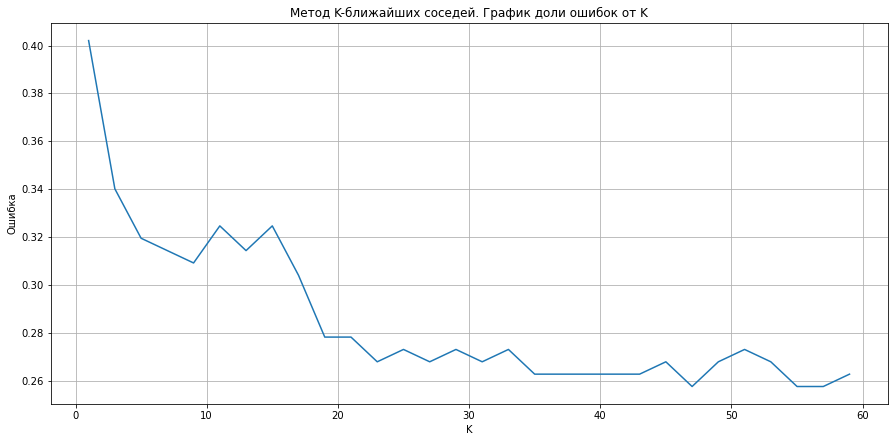

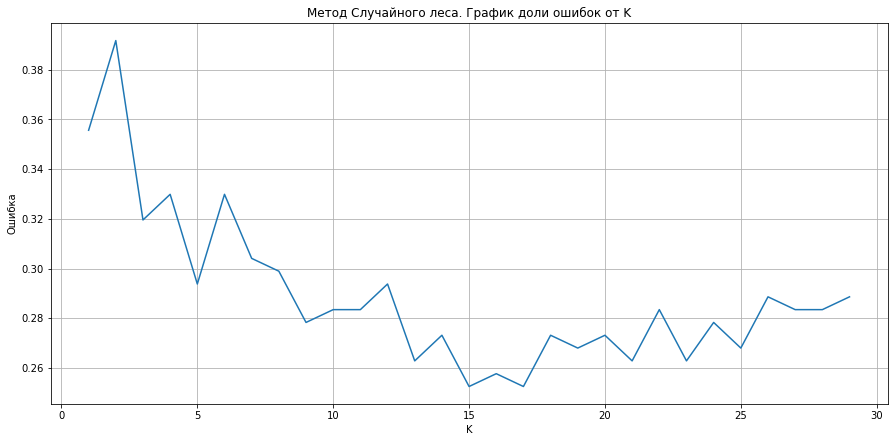

In [13]:
display(f'Метод K-ближайших соседей: минимальная доля ошибок {min(model_knn_errors_k)} при K = {2*model_knn_errors_k.index(min(model_knn_errors_k)) + 1}')
display(f'Логистическая регрессия: доля ошибок {min(model_lr_errors_k)}.')
display(f'Случайный лес: минимальная доля ошибок {min(model_rf_errors_k)} при K = {model_rf_errors_k.index(min(model_rf_errors_k)) + 1}')

plt.figure(figsize=(15, 7))
plt.plot(list(range(1, 60, 2)), model_knn_errors_k)
plt.grid()
plt.title("Метод K-ближайших соседей. График доли ошибок от K")
plt.ylabel("Ошибка")
plt.xlabel("K")
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(list(range(1, 30)), model_rf_errors_k)
plt.grid()
plt.title("Метод Случайного леса. График доли ошибок от K")
plt.ylabel("Ошибка")
plt.xlabel("K")
plt.show()

<a id="title_26"></a>
__Матрица неточностей__

Пользуясь методом матрицы неточностей были получены следующие данные о наборе данных:

* Метод K-ближайших соседей: TN = 4; FP = 50; FN = 1; TP = 139
* Логистическая регрессия: TN = 6; FP = 48; FN = 5; TP = 135
* Метод Случайного леса: TN = 11; FP = 43; FN = 13; TP = 127

Так как специфика датасета - это диагностика заболевания, то наиболее важными критериями при оценке матриц неточности будет: 
* Минимизация истинно отрицательных значений (нельзя допустить, чтобы заболевание осталось незамеченым)
* Максимизация истинно положительных значений (если заболевание есть, то модель должна выявить его наличие)

Под данные критерии подходит модель на основе метода K-ближайших соседей. Примечательно то, что доля ошибок данной модели от модели-фаворита прошлого раздела отличается незначительно.

[Оглавление](#contents)

In [14]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(df_test['Is_sick'], predicted_knn)
cm_lr = confusion_matrix(df_test['Is_sick'], predicted_lr)
cm_rf = confusion_matrix(df_test['Is_sick'], predicted_rf)

tn_knn, fp_knn, fn_knn, tp_knn = cm_knn.ravel()
tn_lr, fp_lr, fn_lr, tp_lr = cm_lr.ravel()
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()

display(f'Метод K-ближайших соседей: TN = {tn_knn}; FP = {fp_knn}; FN = {fn_knn}; TP = {tp_knn}.')
display(f'Логистическая регрессия: TN = {tn_lr}; FP = {fp_lr}; FN = {fn_lr}; TP = {tp_lr}.')
display(f'Метод Случайного леса: TN = {tn_rf}; FP = {fp_rf}; FN = {fn_rf}; TP = {tp_rf}.')


'Метод K-ближайших соседей: TN = 4; FP = 50; FN = 1; TP = 139.'

'Логистическая регрессия: TN = 6; FP = 48; FN = 5; TP = 135.'

'Метод Случайного леса: TN = 11; FP = 43; FN = 13; TP = 127.'

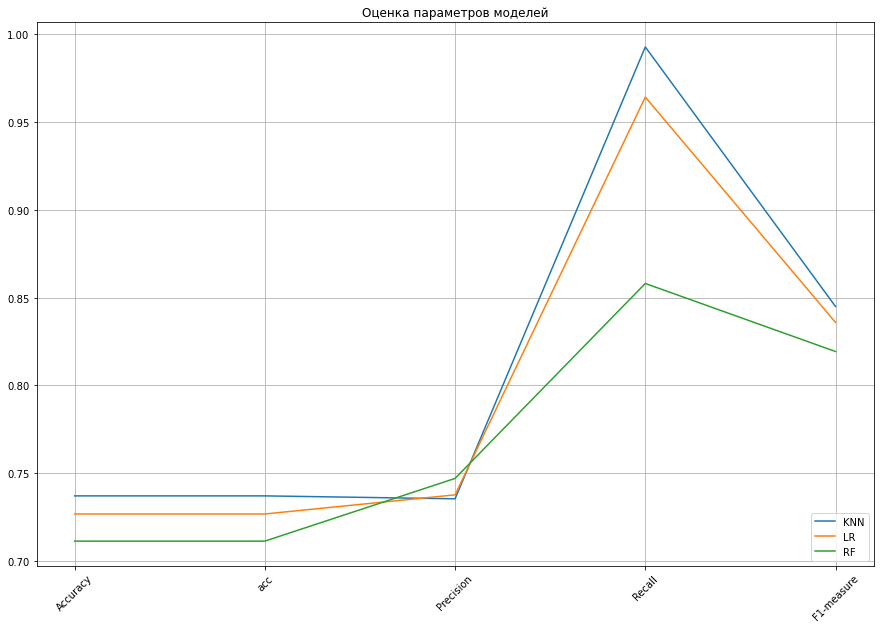

In [15]:
from sklearn import metrics
# Accuracy, acc; Precision; Recall; F1-measure
metrics_labels = ['Accuracy', 'acc', 'Precision', 'Recall', 'F1-measure']

# K-nearest neighbours
Accuracy_knn = (tp_knn + tn_knn) / df_test_len
acc_knn = metrics.accuracy_score(df_test['Is_sick'], predicted_knn)
Precision_knn = (tp_knn) / (tp_knn + fp_knn)
Recall_knn = (tp_knn) / (tp_knn + fn_knn)
F1_knn = metrics.f1_score(df_test['Is_sick'], predicted_knn)

plot_metrics_knn = [Accuracy_knn, acc_knn, Precision_knn, Recall_knn, F1_knn]


# Logistic Regression
Accuracy_lr = (tp_lr + tn_lr) / df_test_len
acc_lr = metrics.accuracy_score(df_test['Is_sick'], predicted_lr)
Precision_lr = (tp_lr) / (tp_lr + fp_lr)
Recall_lr = (tp_lr) / (tp_lr + fn_lr)
F1_lr = metrics.f1_score(df_test['Is_sick'], predicted_lr)

plot_metrics_lr = [Accuracy_lr, acc_lr, Precision_lr, Recall_lr, F1_lr]


# Random forest
Accuracy_rf = (tp_rf + tn_rf) / df_test_len
acc_rf = metrics.accuracy_score(df_test['Is_sick'], predicted_rf)
Precision_rf = (tp_rf) / (tp_rf + fp_rf)
Recall_rf = (tp_rf) / (tp_lr + fn_rf)
F1_rf = metrics.f1_score(df_test['Is_sick'], predicted_rf)

plot_metrics_rf = [Accuracy_rf, acc_rf, Precision_rf, Recall_rf, F1_rf]

# ----------------------------
plt.figure(figsize=(15, 10))
plt.title("Оценка параметров моделей")

plt.plot(metrics_labels, plot_metrics_knn)
plt.plot(metrics_labels, plot_metrics_lr)
plt.plot(metrics_labels, plot_metrics_rf)

plt.grid()
plt.tick_params(axis='x',rotation=45)
plt.legend(['KNN', 'LR', 'RF'], loc="lower right")
plt.show()

Здесь видно, что модель на основе метода K-ближайших соседей показывает лучший результат.

<a id="title_27"></a>
__График ROC-кривой__

ROC-анализ показал, что лучшей является модель, основанная на логистической регрессии.

[Оглавление](#contents)

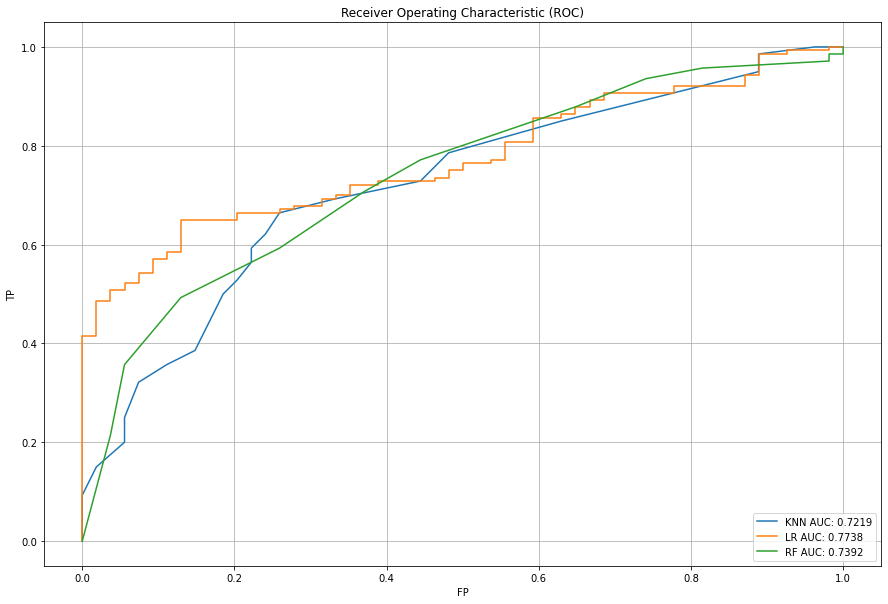

In [16]:
y_pred_knn = model_knn.predict_proba(df_test[features].values.tolist())[:,1]
y_pred_lr = model_lr.predict_proba(df_test[features].values.tolist())[:,1]
y_pred_rf = model_rf.predict_proba(df_test[features].values.tolist())[:,1]

fpr_knn, tpr_knn, _ = metrics.roc_curve(df_test['Is_sick'], y_pred_knn)
fpr_lr, tpr_lr, _ = metrics.roc_curve(df_test['Is_sick'], y_pred_lr)
fpr_rf, tpr_rf, _ = metrics.roc_curve(df_test['Is_sick'], y_pred_rf)

auc_knn = round(metrics.roc_auc_score(df_test['Is_sick'], y_pred_knn), 4)
auc_lr = round(metrics.roc_auc_score(df_test['Is_sick'], y_pred_lr), 4)
auc_rf = round(metrics.roc_auc_score(df_test['Is_sick'], y_pred_rf), 4)


plt.figure(figsize=(15, 10))

plt.plot(fpr_knn, tpr_knn)
plt.plot(fpr_lr, tpr_lr)
plt.plot(fpr_rf, tpr_rf)

plt.grid()
plt.title("Receiver Operating Characteristic (ROC)")
plt.ylabel("TP")
plt.xlabel("FP")
plt.legend([f'KNN AUC: {auc_knn}', f'LR AUC: {auc_lr}', f'RF AUC: {auc_rf}'], loc="lower right")
plt.show()


<a id="title_28"></a>
__Выводы__

По ходу работы были построены три модели данных, основанные на следующих методах:
* Метод K-ближайших соседей
* Логистическая регрессия
* Метод Случайного леса

Был проведен анализ оценки качества результатов модели и выбор наилучшей, основываясь на следующих метриках:
* Accuracy
* Precision
* Recall
* Balanced accuracy
* F1-мера
* Матрица неточностей
* ROC анализ модели

Произведен отбор модели в пользу основанной на логистической регрессии.

Сравнивая полученные оценки параметров полученных моделей, можно сказать, что различные подходу к оценке модели дают различные метрики и, соответственно, различные варианты оценивания наилучшей модели.

Однако, если объеденить оценивающие параметры (метрики) в единую совокупность, то можно выделить то, что модель, основанная на методе логистической регресси показывает средние или наивысшие результаты, в отличие от остальных моделей, оценки параметров которых "плавают" от худшего к лучшему без какого-либо компромисного варианта.

Исходя из этого, оптимальным выбором, учитывая всё многообразие метрик, будет модель основанная на логистической регрессии.

[Оглавление](#contents)